<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Assignment 1</h1>
<h2>Winter 2022</h2>
</center>

Your assignment is to be submitted as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order, on Brightspace. Use [markdown syntax](https://www.markdownguide.org/cheat-sheet/) to format your answers

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [Camscanner](https://www.camscanner.com/user/download) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image, together with its content, then appears.

Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. You should also include the results of running your code. 

The marking criteria are described in rubrics. There are two rubrics, for math questions, and for experimental questions, respectively. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Milios-Evangelos-Assignment-1.ipynb** \\

## **1. Vectors, hyperplanes and projections** (8 pts)









 

Consider a vector space of two dimensions $(x_1, x_2)$, a point $A=(1,2)$ and a vector $\mathbf{v} = (1, 1)$.

a) What is the point defined by $\mathbf{v}$ considered as a position vector? If you move by one unit of length from point $A$ in the direction of $v$, what is the new point $B$ you will arrive at?



![IMG_0987[137].jpg](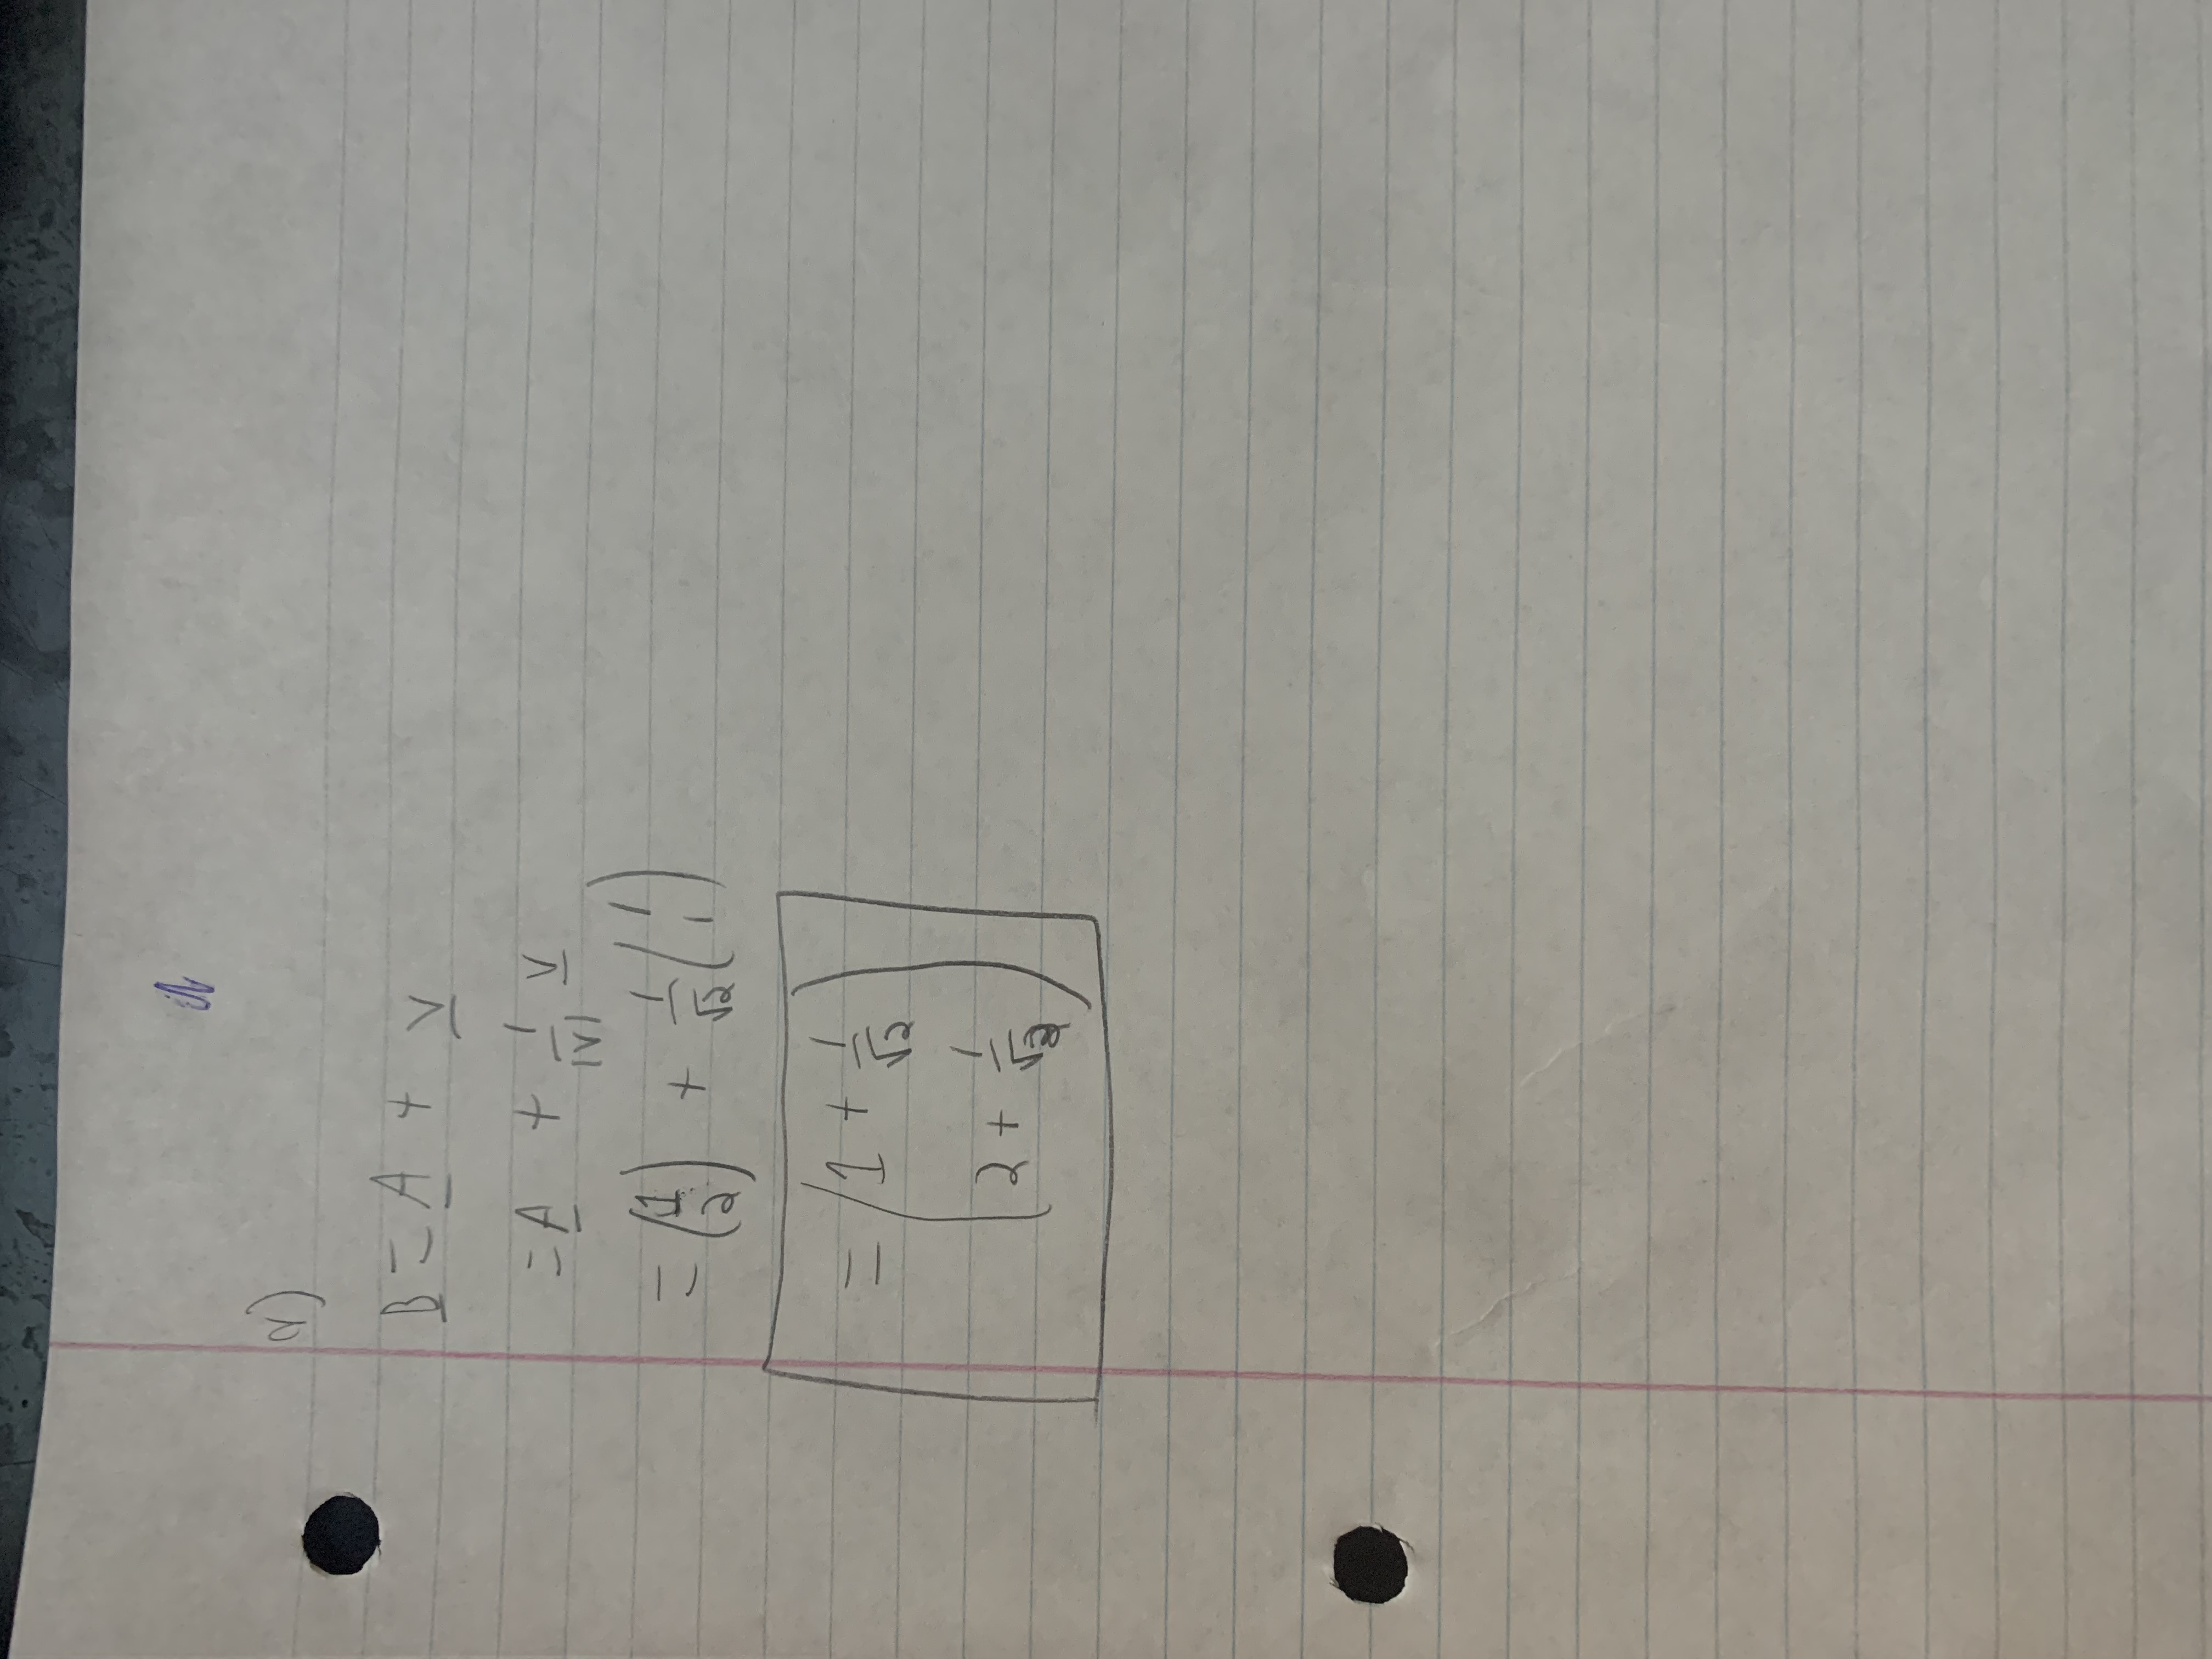)

b) What is the position vector of a point $P$ derived by moving from point $A$ along $\mathbf{v}$ by a distance $s$? The result is a parametric representation of a line, where the parameter is $s$. The line contains $A$ and it is parallel to vector $\mathbf{v}$.

![IMG_0988[173].jpg](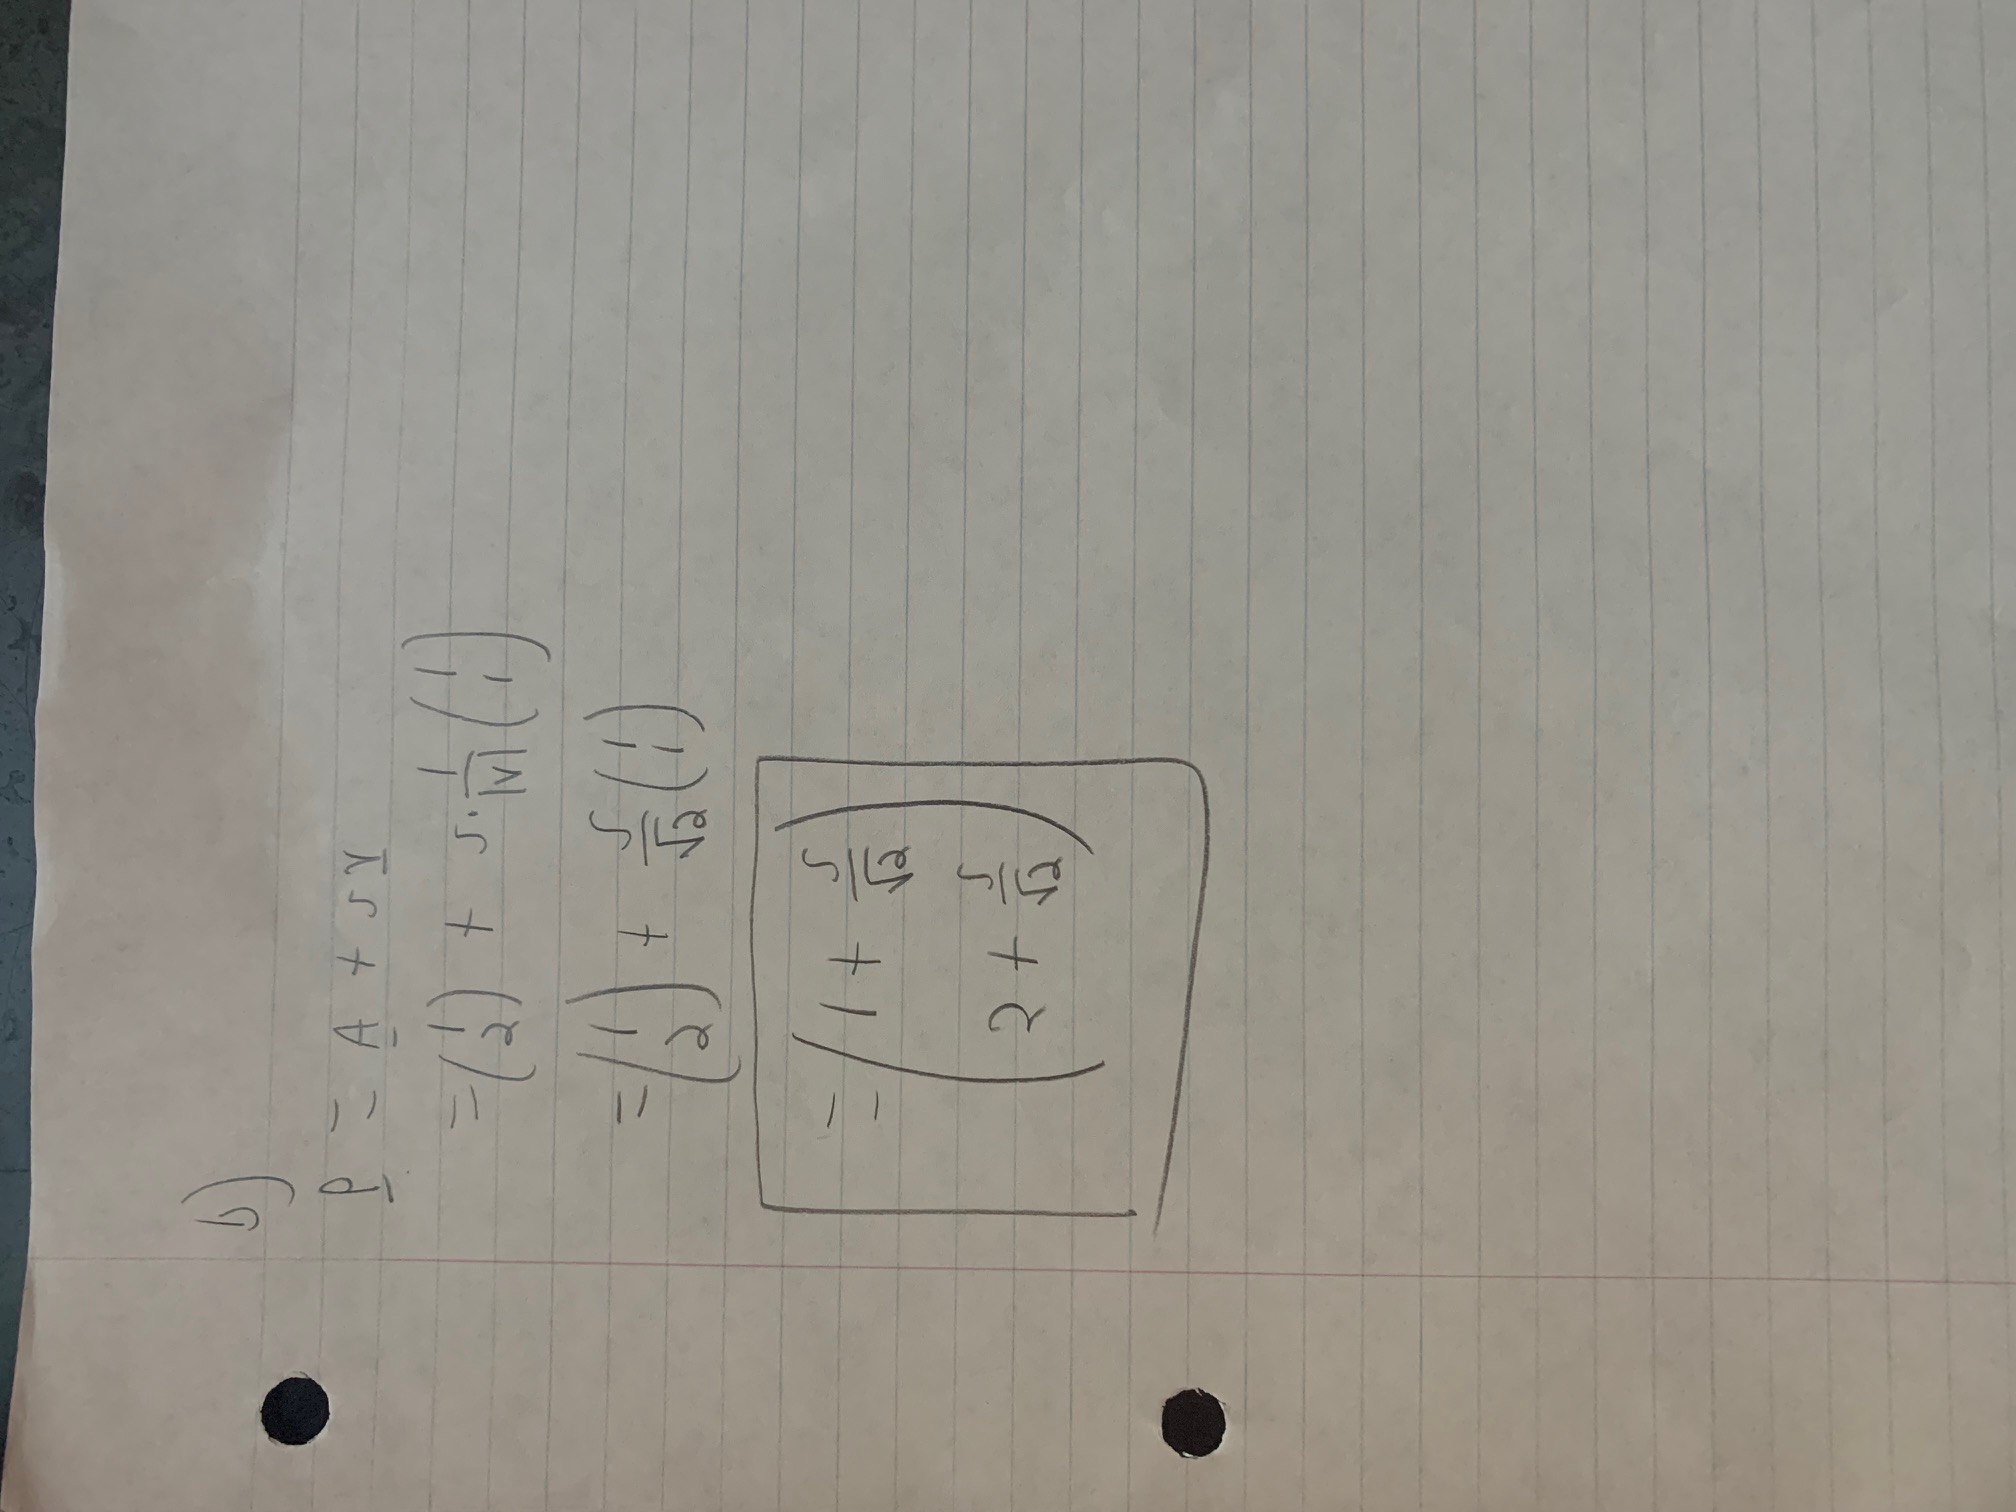)

c) Find vector $\mathbf{u}$ that is perpendicular to vector $\mathbf{v}$ above.

![IMG_0989[157].jpg](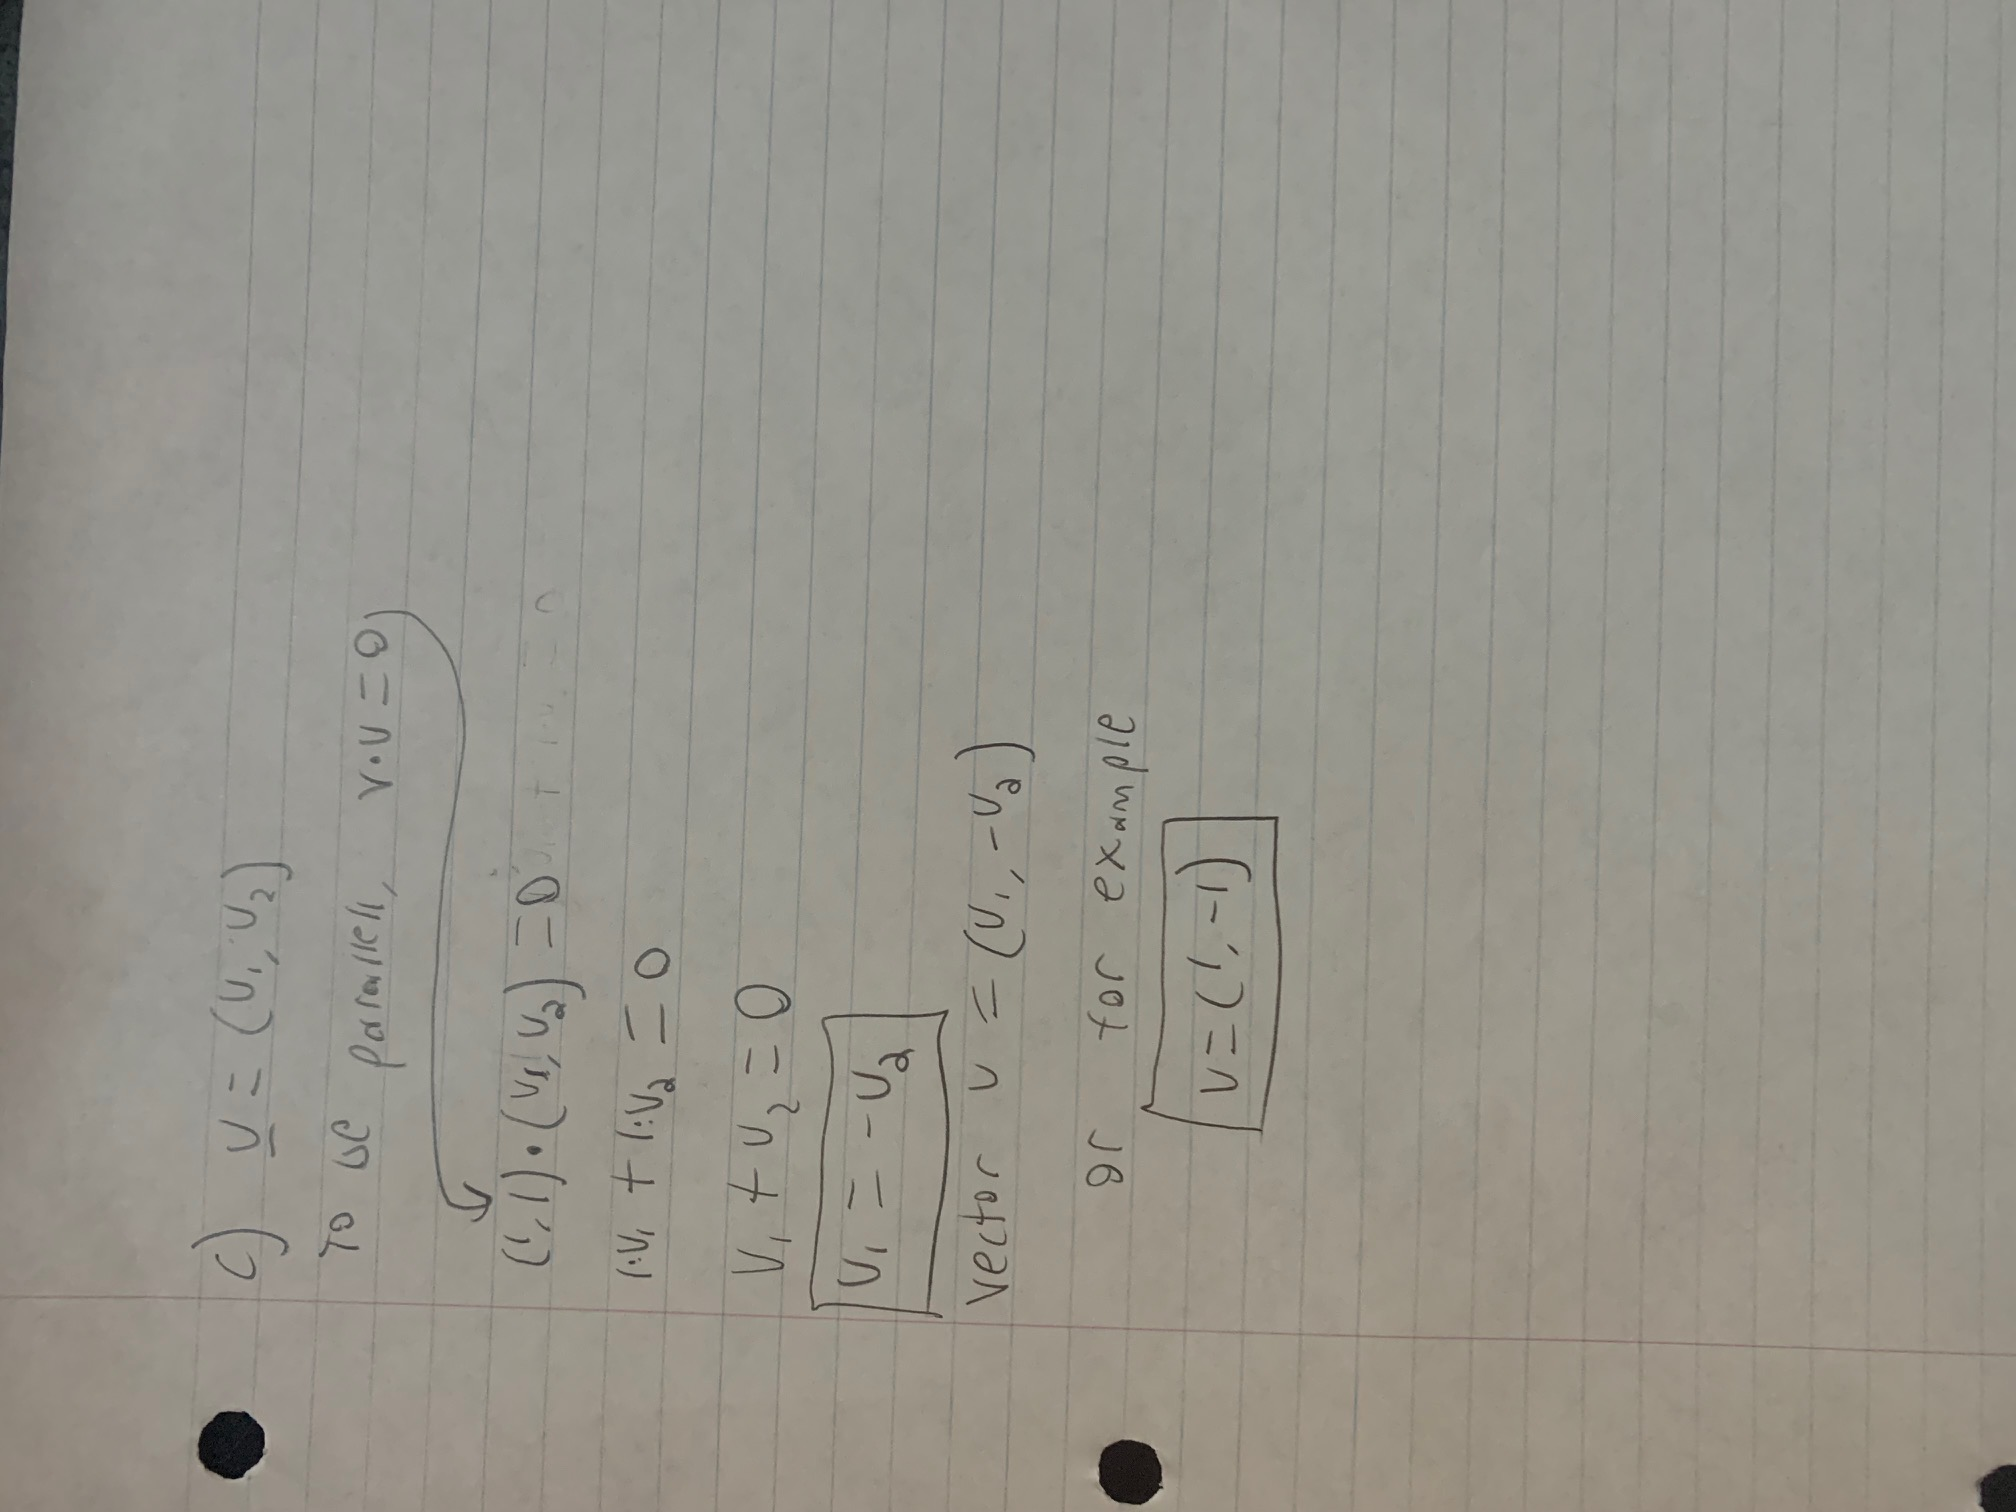)**Answer 1(c)**

d) Given point $A$ and vector $\mathbf{v}$, provide a vector equation that every point $P$ on the line must satisfy.
Reduce this equation to the form $ay_1 + by_2 = 1$, i.e. calculate $a$ and $b$ in terms of $A$ and $\mathbf{v}$.
$y_1, y_2$ are the coordinates of $P$. \\
>Hint: the inner product of vector $\mathbf{v}$ and a vector parallel to the line is zero.

![IMG_0990[161].jpg](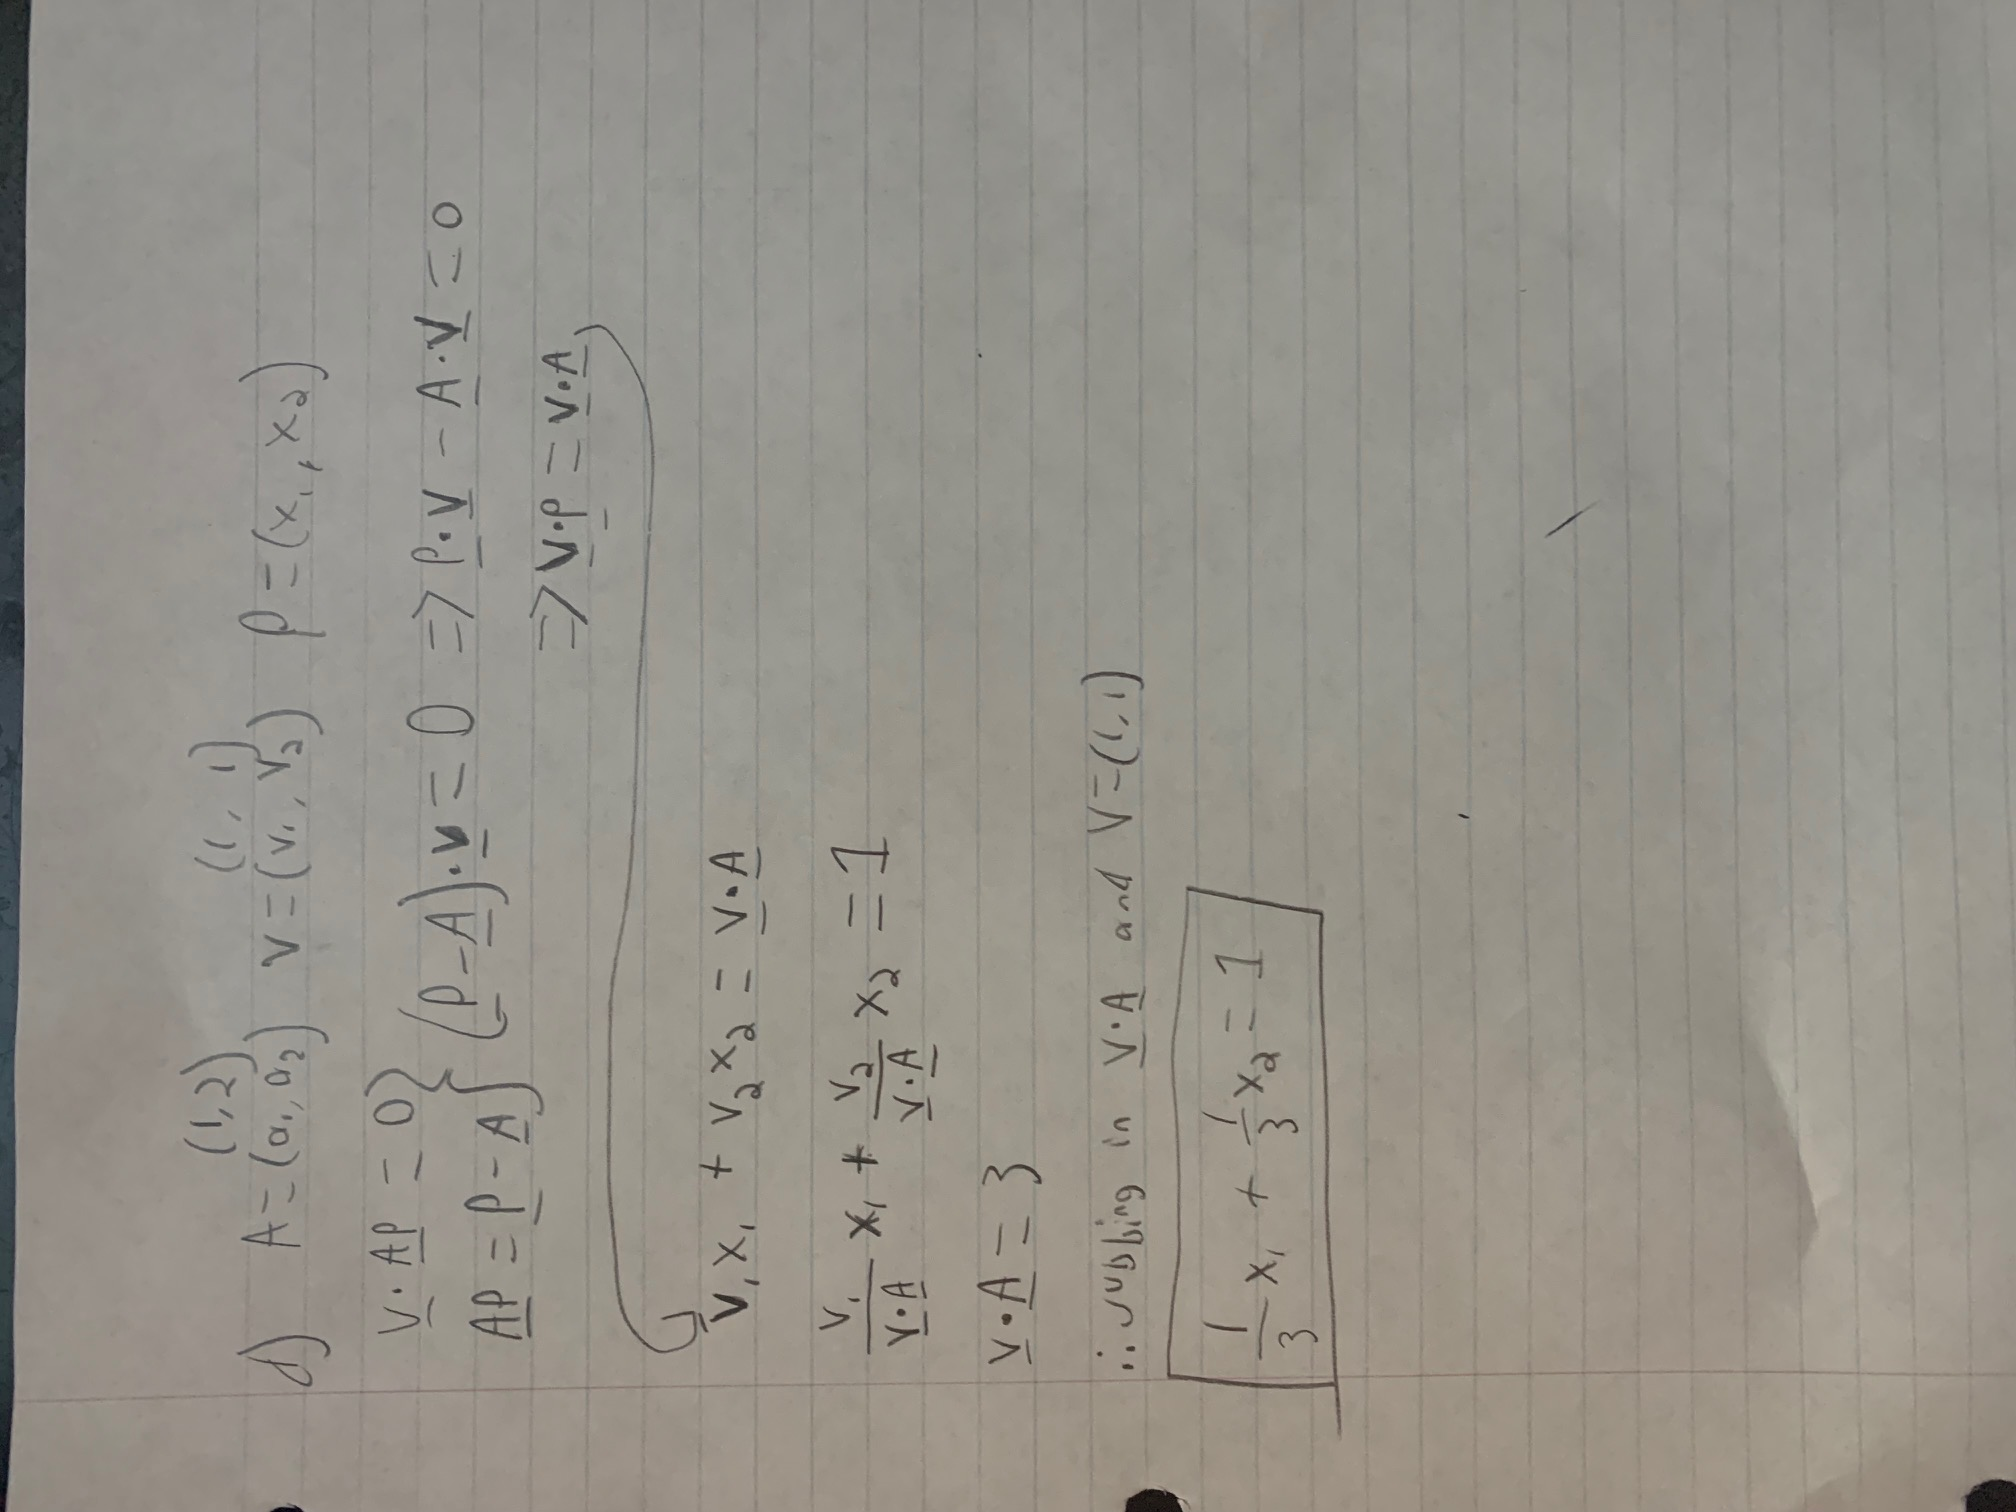)**Answer 1(d)**

e) Generalize part (d) to a plane in three dimensions, i.e. given point $A$ and vector $\mathbf{v}$, provide a vector equation that every point $P$ on the plane must satisfy.
 Can you reduce this equation to the form $ay_1 + by_2 + cy_3 = 1$, where $y_1, y_2, y_3$ are the coordinates of $P$? \\
 >Hint: the inner product of vector $\mathbf{v}$ with a vector parallel to the plane is zero.

 

![IMG_0991[165].jpg](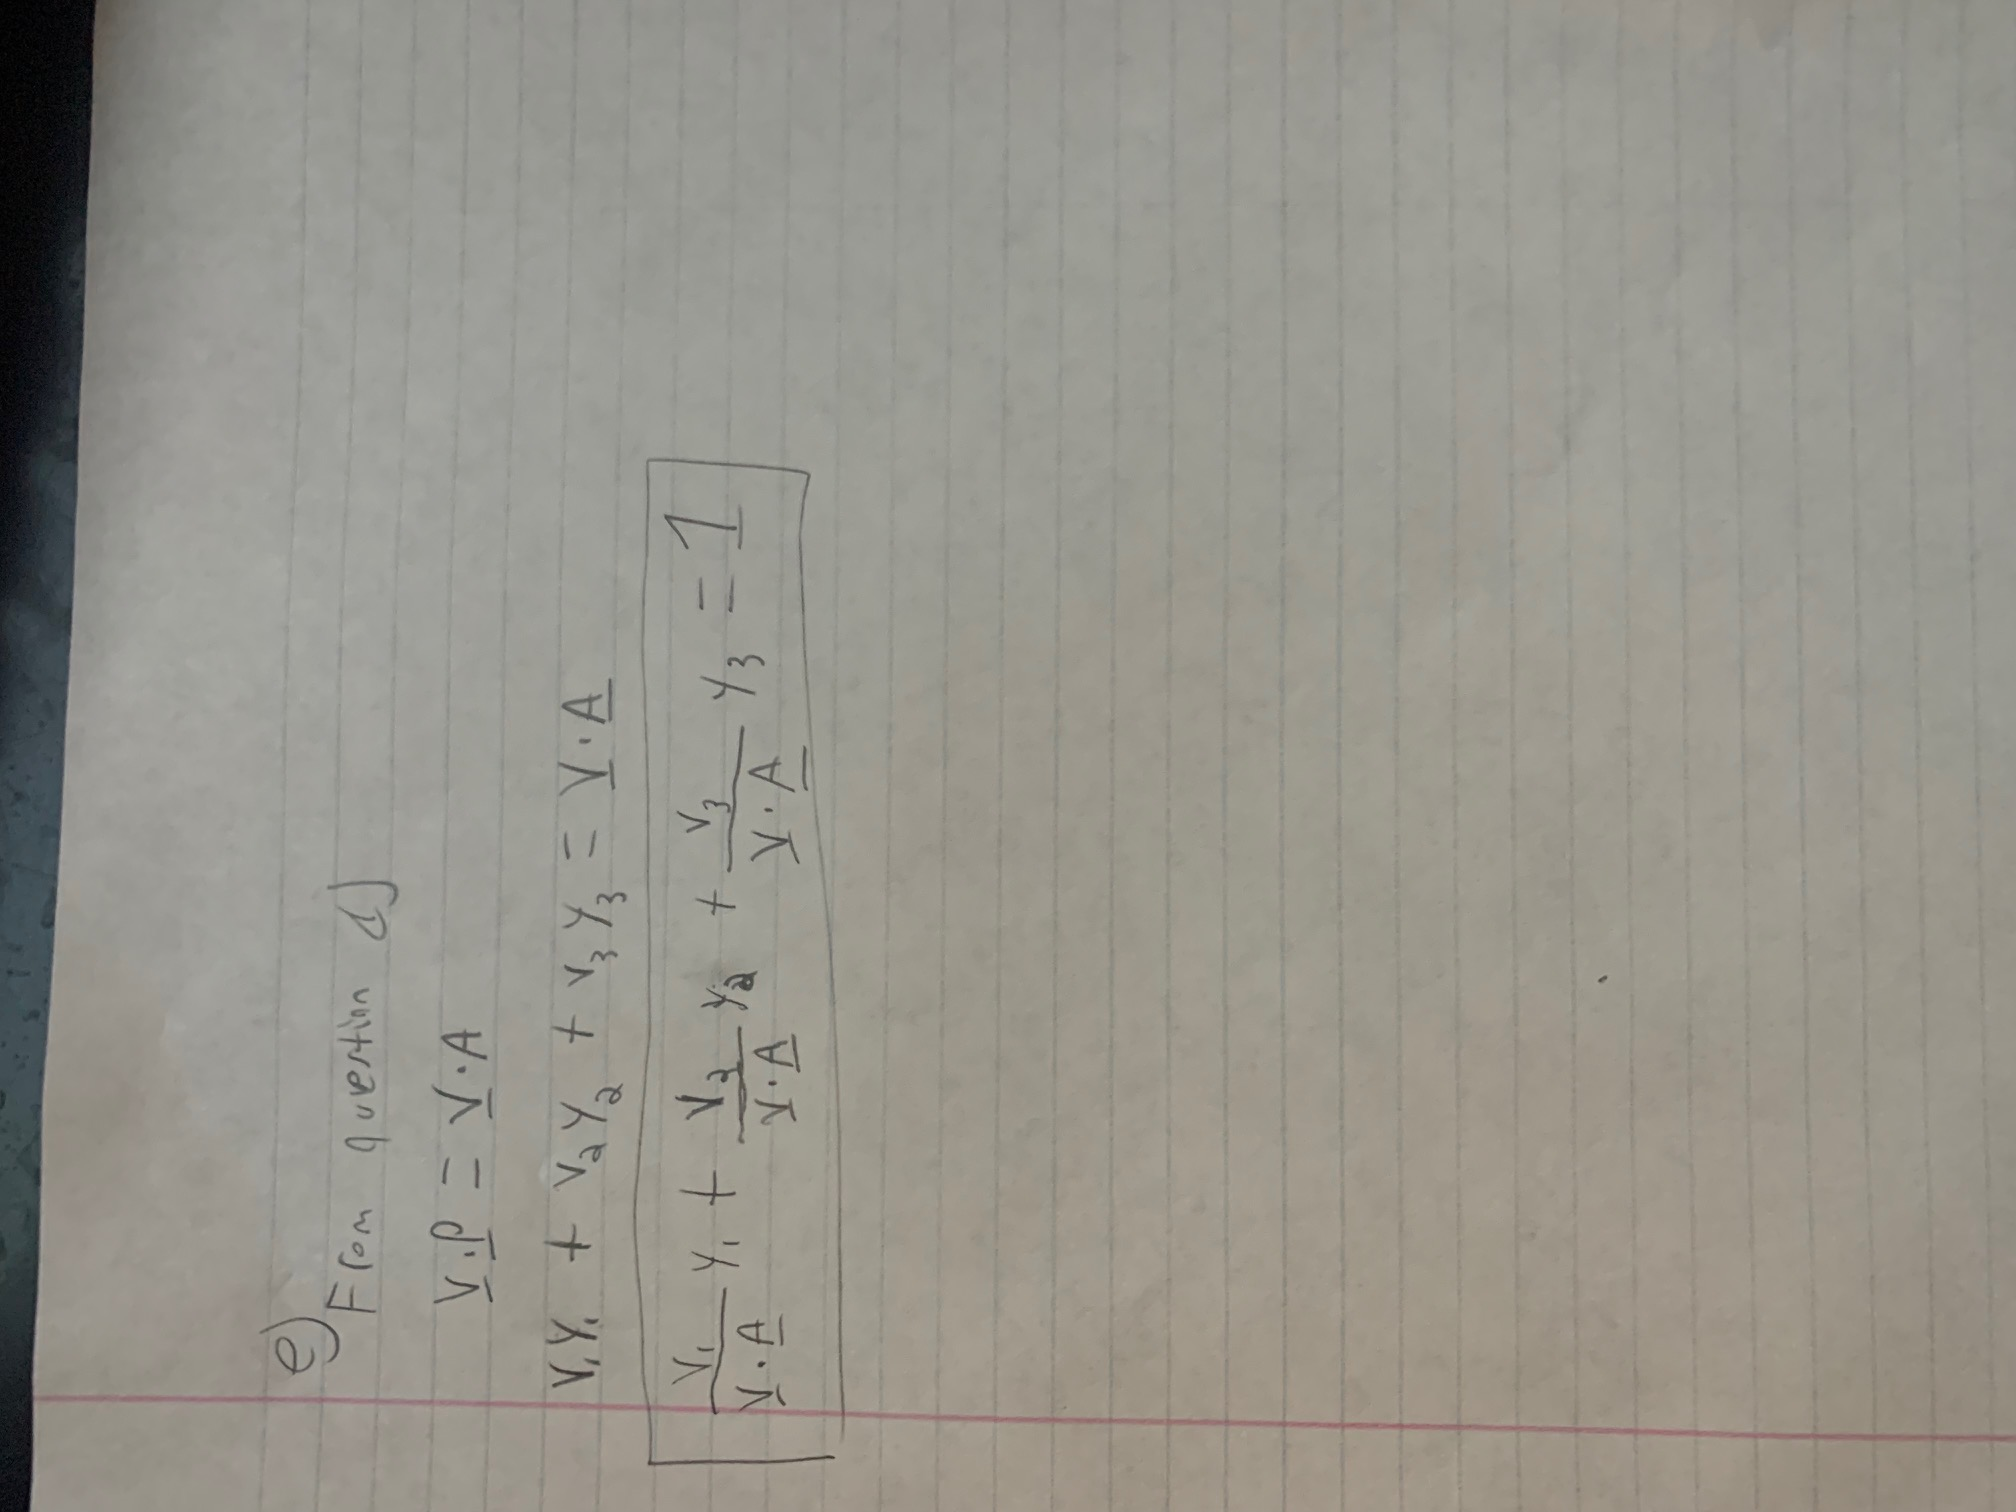)

f) Consider a plane in three dimensions defined by a point $A$ and a normal vector $\mathbf{v}$. Given a point $B$ not on the plane, find the projection $B'$ of point $B$ onto the plane.
*Hint*: You can make use of two properties about projection $B'$. One property is based on vector $B' - A$ being parallel to the plane. Another property is based on vector $B' - B$ being parallel to vector $\mathbf{v}$.

**Answer 1(f)**

## **2.Vectorized gradient descent** (12 pts)

In [ ]:
import numpy as np
from sklearn import datasets
import plotly.express as px

In this question we are going to learn first hand how gradient descent works in the context of a toy dataset. Note that we are not making use of a validation strategy here by using a test set or cross-fold validation—which is something that would be otherwise generally recommended. This exercise focuses on the inner workings of gradient descent applied to the quadratic cost function that was learned in the Linear regression class. 
>Note : It’s important that the
code provided is well documented and that no other external package is used (pandas, numpy
are ok).

In [ ]:
X,y = datasets.make_regression(100,2,random_state= 42)
print(f'X shape: {X.shape}\ny shape:{y.shape}')

X shape: (100, 2)
y shape:(100,)


a) Given the values of **X**, we want to fit a linear regression model to predict the **y** values. We will implement a vectorized version of the gradient descent algorithm. Input (X) and target (y) are provided as arguments. X is modified (X_b) to account for the bias. The coefficients (theta) have been initialized for you. The shape of the variables X, y, b have been given, use this as a guide to output appropriate shape.


 Fill in the missing variables inside the gradient descent iteration loop and return the updated cost_list and parameters.


In [ ]:
def LR(X,y,lr,iterations):
    # Initializations
    # Adding 1 column in X for bias
    b = np.ones((len(X),1))             # shape : (N,1)
    X_b = np.append(X,b,axis=1)         # Shape : (N, features+1)
    theta = np.zeros((X_b.shape[1],1))  # shape : (features+1 ,1)
    y = y.reshape(-1,1)                 # shape : (N,1)          
    cost_list = []
    theta_history = []

    
    # Gradient Descent
    # Fill Code Below
    for iter in range(iterations):
      
    # Compute y using initial values of parameters
      y_pred = np.dot(X_b, theta)

    # Compute loss  (Using mean squared error formula)
      n = len(y)
      loss = (1/2) * ((y_pred - y)**2)

    # Compute the cost and append to cost_list. This would be later used for plotting.
      
      cost = np.sum((y_pred-y)**2)/(2. * n)
      cost_list.append(cost)

    # Compute the average gradient of loss function with respect to theta.
    # gradient -> (y-t)*x
      avgGradLoss = (X_b.T.dot(y_pred-y))
    
    # Notice the (y_pred - y) is broadcasted along axis 1 for multiplication.

    # Perform an optimization step on the parameters manipulating theta using learning rate
      theta = theta - (lr/n)*avgGradLoss

    return cost_list,theta

    #write a small explanations, how you are able to solve this?
    #I was able to solve the gradient descent problem by first calculating the predicted y value with X_b and theta and then using that to calculate the cost of the current iteration.
    #I then optimized theta to account for the loss in the gradient and ended the iteration
    

In [ ]:
def plot_losses(cost_list):
  """This function plots the cost_list"""
  fig = px.line(y= cost_list)
  fig.update_layout(title= "Loss vs Iteration",xaxis_title='Iteration',yaxis_title='Cost')
  return fig

In [ ]:
# Run this cell to view how loss changes with iterations

cost_list, theta = LR(X,y,0.01,1000)
plot_losses(cost_list)

Below is a function that takes as input the parameters($\theta$) and Input (X). Fill in the missing code to output the y value using the input parameters.

In [ ]:
# theta shape : (features+1 ,1)
def predict(theta, x):
  # Fill code below
  y = np.dot(x, theta)
  return y



b) Compare this model with a solution computed in closed form. Input (X) and target (y) are provided as arguments. X is modified (X_b) to account for the bias. The function should return the optimum parameters($\theta$).


In [ ]:
from numpy.linalg import inv
def linear_direct(X,y):

  #initializations
  b = np.ones((len(X),1))          # shape : (N,1)
  X_b = np.append(X,b,axis=1)
  theta = np.zeros((X_b.shape[1],1))  # shape : (features+1 ,1)
  #y = y.reshape(-1,1) 
  # Fill code below
  theta = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

  return theta


In [ ]:
# parameters found by direct method
linear_direct(X,y).astype(int)

array([87, 74,  0])

In [ ]:
# parameters found by gradient descent
theta.astype(int)

array([[87],
       [74],
       [ 0]])

c) Discuss how the choice of learning_rate and number of iterations in part (a) affects the fitting of the model?

In [ ]:

def plot_fit(X,y,lr,itr):
  tList, tTheta = LR(X,y,lr,itr)
  plot_losses(tList).show()

plot_fit(X,y,0.01,1000)
plot_fit(X,y,0.01,100)
plot_fit(X,y,0.01,10)
plot_fit(X,y,0.001,1000)
plot_fit(X,y,0.001,100)
plot_fit(X,y,0.001,10)

'''
It was evident when expeimenting with different LR's and Iterations that a higher learning rate comes to a solution much quicker than a lower learning rate and in turn generates steeper curves on a graph.
A lower learning rate, will learn slower and in turn, generate more mellow curves on the graph but is usually generates a more accurate model.
I found Iterations had to be tuned depedning on what the learning rate is. A slower(lower) learning rate needed to have more iterations as it took longer to produce an optimal solution where as a high learning rate
didnt need as many iterations as it produced a steep curve on the early on and did not need many itertations past that.
'''


"\nIt was evident when expeimenting with different LR's and Iterations that a higher learning rate comes to a solution much quicker than a lower learning rate and in turn generates steeper curves on a graph.\nA lower learning rate, will learn slower and in turn, generate more mellow curves on the graph but is usually generates a more accurate model.\nI found Iterations had to be tuned depedning on what the learning rate is. A slower(lower) learning rate needed to have more iterations as it took longer to produce an optimal solution where as a high learning rate\ndidnt need as many iterations as it produced a steep curve on the early on and did not need many itertations past that.\n"



## **3.Classification** (10 pts)


In this question, you will experiment with different classification algorithms from Sklearn API on the [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). 

In [ ]:
from sklearn import datasets

X,y = datasets.load_iris(return_X_y=True)


In [ ]:
#Uncomment to know more about the dataset
print(datasets.load_iris().DESCR)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
 # This shows the counts of labels 
def plot_distribution(y):
    plt.hist(y)
    plt.xticks([0,1,2],['Class_0','Class_1','Class_2'])
    plt.title('Distribution of labels')
    plt.ylabel("frequency")
    plt.show()

plot_distribution(y)

In [ ]:
pd.DataFrame(y).value_counts()

a) First your task is to divide the above dataset into 3 splits (i.e. training, validation and test sets) such that each split follows  approximately the same distribution of labels as the original dataset.The distribution of labels in the original dataset has been plotted for you above. The aim of this question is for you to read the [scikit-learn API](https://scikit-learn.org/stable/user_guide.html) and get comfortable with training/validation splits. 




Implement the following function to return 3 data splits in the ratio 7:1:2 (namely the training set, validation set and test set respectively) such that each split follows a similar distribution of labels.

>Hint : [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a helpful sklearn function for this task.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
def return_splits(X,y)-> (tuple):
  """This function should return three tuples, one for each split.
     where each tuple should contain (X_split,y_split) respectively. """

  # Code below
  xTrain, xTempTest, yTrain, yTempTest = train_test_split(X, y, train_size=0.7)
  xValidation, xTest, yValidation, yTest = train_test_split(xTempTest, yTempTest, train_size=0.33)
  
  print(len(xTest))

  train_set = (xTrain, yTrain)
  validation_set = (xValidation, yValidation)
  test_set = (xTest, yTest)

  return train_set,validation_set,test_set


31


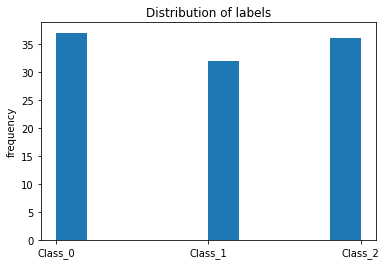

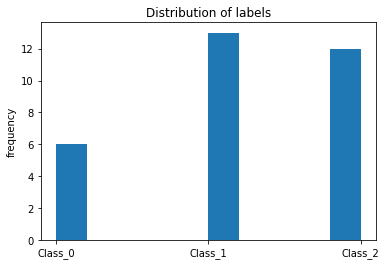

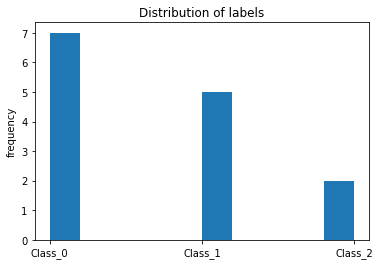

In [ ]:
#Run this cell to get your splits and plot the distribution of labels for each split.

train_set,validation_set,test_set = return_splits(X,y)

# The 3 plots should look similar.
plot_distribution(train_set[1])
plot_distribution(test_set[1])
plot_distribution(validation_set[1])

In this question you will experiment with two traditional classification models.The objective of this question is to demonstrate your ability to compare different machine learning models, and derive a conclusion
if possible. 

The models are: 
* [SVM Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Here we will use a different method to validate models, which is called k-fold cross validation ([Stratified K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)).



>Note: Since, here we would use k-fold cross validation. You do **not need** to use the splits defined in the previous question.

In [ ]:
X,y = datasets.load_iris(return_X_y=True)







b) For the SVM classifier, use the default parameters, and 5-fold cross validation, and report the
overall accuracy and confusion matrix, as well as accuracy and confusion matrix for each fold.
What is the standard deviation of accuracy over the folds?   


Overall Accuracy: 0.92
Overall Standard Deviation of Accuracy over Folds: 0.04
Fold 1 Accuracy: 0.91


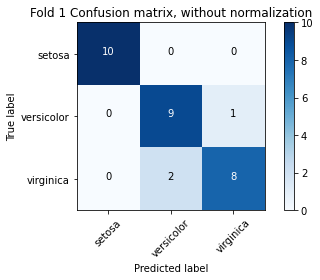

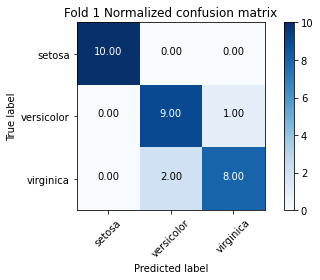

Fold 2 Accuracy: 0.93


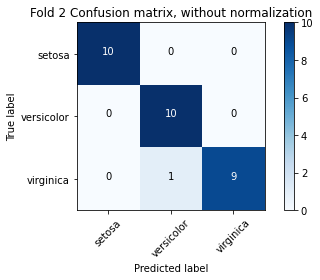

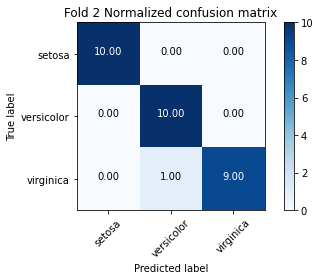

Fold 3 Accuracy: 0.91


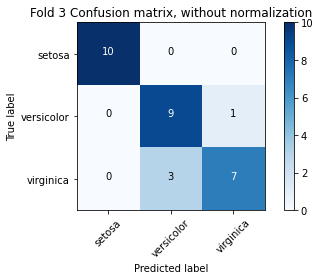

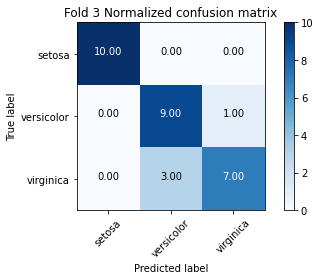

Fold 4 Accuracy: 0.91


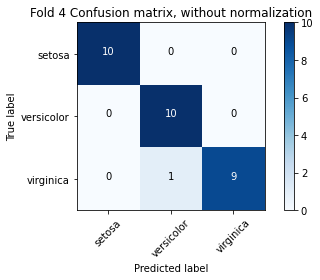

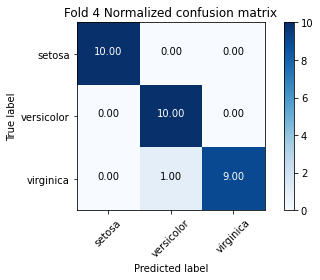

Fold 5 Accuracy: 0.92


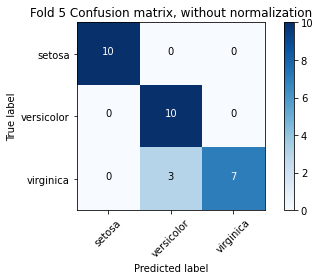

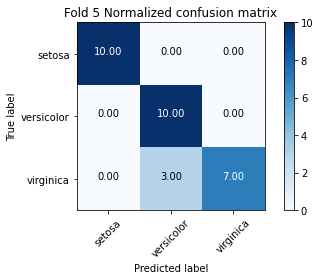

In [ ]:
# code here
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

#Confusion matrix plot function taken from tutorial 4
#https://colab.research.google.com/drive/1wD0Cec72Td_5kxUqTbcgIij1kvt5X0CL
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



class_names = datasets.load_iris().target_names
clf = svm.SVC(kernel='linear', C=0.01)

skf = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
print("Overall Accuracy: {:.2f}".format(scores.mean()))
print("Overall Standard Deviation of Accuracy over Folds: {:.2f}".format(scores.std()))
#iterating through each fold and printing accuracy and computer matrix for that fold
i = 1#used to label each fold
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  scores = cross_val_score(clf, X_train, y_train, cv = 5)
  print("Fold {:d} Accuracy: {:.2f}".format(i, scores.mean()))
  y_pred = clf.fit(X_train, y_train).predict(X_test)#predicting y values from training and test sets to use in confusion matrix
  #Plotting used from Tutorial 4
  #https://colab.research.google.com/drive/1wD0Cec72Td_5kxUqTbcgIij1kvt5X0CL
  #Compute confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision=2)
  #Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, title= ("Fold {:d} Confusion matrix, without normalization".format(i)))
  #Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title="Fold {:d} Normalized confusion matrix".format(i))
  plt.show()
  i = i + 1




 c) For the Random Forest classifier, experiment with different numbers of trees in the forest using n_estimators    (range from 10, 20, 30 to 100).Experiment with other parameters as needed. Evaluate each
parameter selection using 5-fold cross validation, and report the overall accuracy and the
confusion matrix. Only report the interesting parameter settings.
>Hint: [Grid Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a helpful utility for this task.  



Overall Accuracy: 0.96
Overall Standard Deviation of Accuracy over Folds: 0.02
Fold 1 Accuracy: 0.96


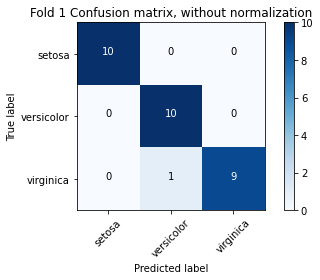

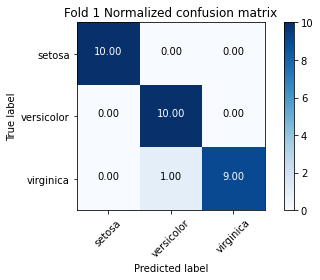

Fold 2 Accuracy: 0.96


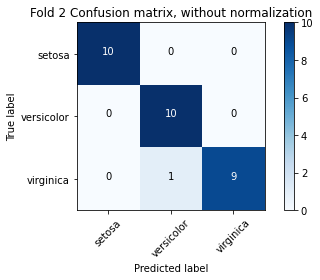

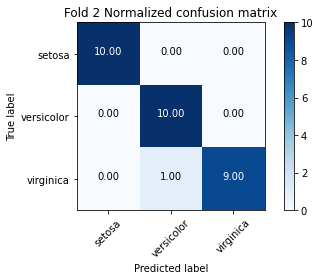

Fold 3 Accuracy: 0.96


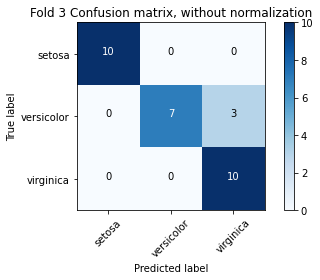

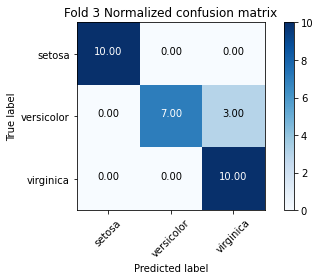

Fold 4 Accuracy: 0.96


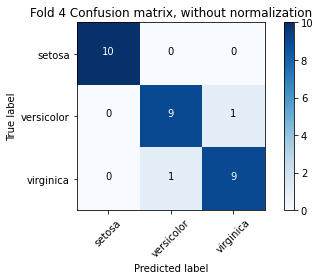

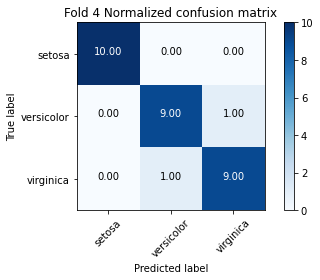

Fold 5 Accuracy: 0.94


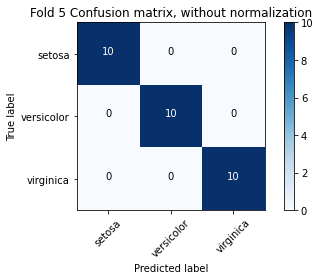

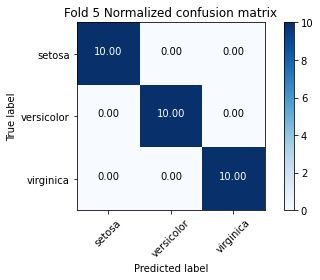

In [ ]:
# code here
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#Confusion matrix plot function taken from tutorial 4
#https://colab.research.google.com/drive/1wD0Cec72Td_5kxUqTbcgIij1kvt5X0CL
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



class_names = datasets.load_iris().target_names

clf = RandomForestClassifier(n_estimators=10)
skf = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
print("Overall Accuracy: {:.2f}".format(scores.mean()))
print("Overall Standard Deviation of Accuracy over Folds: {:.2f}".format(scores.std()))
#iterating through each fold and printing accuracy and computer matrix for that fold
i = 1#used to label each fold
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  scores = cross_val_score(clf, X_train, y_train, cv = 5)
  print("Fold {:d} Accuracy: {:.2f}".format(i, scores.mean()))
  y_pred = clf.fit(X_train, y_train).predict(X_test)#predicting y values from training and test sets to use in confusion matrix
  #Plotting Used from Tutorial 4
  #https://colab.research.google.com/drive/1wD0Cec72Td_5kxUqTbcgIij1kvt5X0CL
  #Compute confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision=2)
  #Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, title= ("Fold {:d} Confusion matrix, without normalization".format(i)))
  #Plot normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title="Fold {:d} Normalized confusion matrix".format(i))
  plt.show()
  i = i + 1


In [ ]:
# We will report the accuracy and confusion matrix (train) from the best performing classifier.
print(f"Accuracy : {round(clf.best_score_,2)*100}%") 
plot_confusion_matrix(clf.best_estimator_,X,y)

 d) Summarize your findings from (a) and (b). What is the best performing classifier on the iris data set, considering the mean and standard deviation of accuracy of the two classifiers? 



```
Its evident from the results of the above code cells that the Random Forest Classifier performed better on the iris data set than the SVM classifier. Depending on the number of estimators the Random Forest Classifier executed at a 95-97% accuracy range whereas the SVM classifier executed at 92% accuracy. On top of this, the standard deviation of accuracy between folds was found to be lower for the Random Forest Classifier(0.02) compared to the SVM classifier(0.04). Overall, the Random Forest Classifier was able to clasify the groups in the data set more acuratelty than the SVM classifier.
```

Answer here: 


## **4. Polynomial regression** (10 pts)




This question aims at applying polynomial regression (generating [Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) followed by [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) on a large data set and deciding the set of hyperparameters that best applies to this scenario.

a) Use the [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) from scikit-learn and apply a polynomial regression with the full set of features. Experiment with polynomials of different degrees. Compare their performance with each other using a fixed training and testing partition (where the training set is 80% of the data set and the remainder for testing).  



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)

In [ ]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

number of features 11
Polynomial degree 1 Accuracy: -3000.38


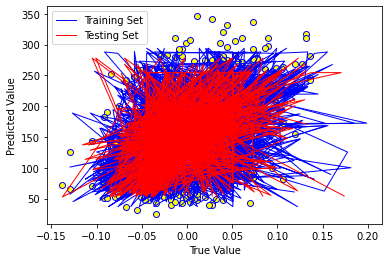

number of features 66
Polynomial degree 2 Accuracy: -3455.20


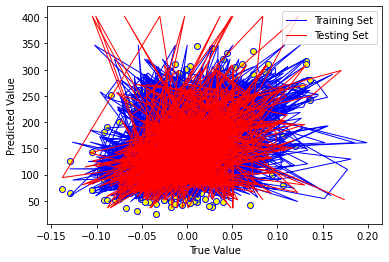

number of features 286
Polynomial degree 3 Accuracy: -185513.70


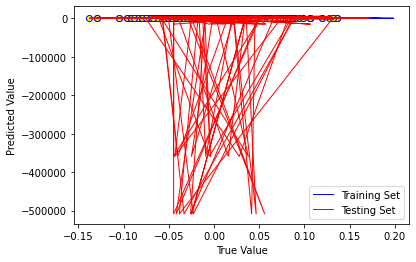

number of features 1001
Polynomial degree 4 Accuracy: -413981.66


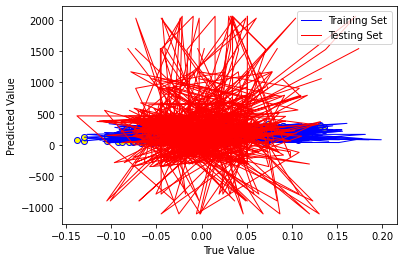

In [ ]:
#code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False,train_size=0.8, test_size=0.2)#splitting data sets
for i in range(1,5):
  
  #Code is pulled from TA Bhuvaneshwari Basquarane's answer to Gabriel Marchands question "Q4 what is the target?" in the discussion form for A1 on brightspace
  #https://dal.brightspace.com/d2l/le/201535/discussions/threads/860297/View
  pipe = Pipeline(steps=[('polynomial_features',PolynomialFeatures(degree=i)),('regression',LinearRegression())])
  print(f"number of features {PolynomialFeatures(i).fit_transform(X_train).shape[1]}")
  pipe.fit(X_train,y_train)
  test_predict = pipe.predict(X_test)
  train_predict = pipe.predict(X_train)


  score = cross_val_score(pipe, X, y, scoring="neg_mean_squared_error", cv=10)

  print("Polynomial degree {:d} Accuracy: {:.2f}".format(i, np.mean(score)))

  plt.plot(X_train, train_predict, color='blue', linewidth = 1, label="Training Set")#plotting training set line
  plt.plot(X_test, test_predict, color='red', linewidth = 1, label="Testing Set")#plotting testing set line
  
  plt.scatter(X[:,-1],y, color='yellow', edgecolor = "blue")
  plt.xlabel("True Value")
  plt.ylabel("Predicted Value")
  #ensuring that labels only print once in the legend
  handles, labels = plt.gca().get_legend_handles_labels()
  labelDict = dict(zip(labels, handles))
  plt.legend(labelDict.values(), labelDict.keys())

  plt.show()









b) Discuss the interpretation of the results.
Use visualizations of appropriate quantities to make sense of the results and support your interpretation.

In [ ]:
# plotting test vs train
"""
When experimenting with Polynomial Regression on the diabetes data set I noticed a large performance gap between the training and testing partitions, particularly as the degree of the polynomial increased.
In the first graph which represents a polynomial of degree 1, its clear that the testing partition line is for the most part contained within the training partition line and neither of the line's stretch out to cover 
some of the outliers in the data set, especially the testing line. I beleive this to be due to the randomness of the split between training and testing sets. The testing set only covers 20% of the overall data so it 
makes sense that it would not be exposed to as many outliers as the training set and therefore does not take them into account as much as the training set. 

In the second graph, its clear that the testing partition begans to branch out and try to reach outliers even more so than the training partition. I bleeieve this to be due to the testing partitions size and
experience dealing with the data set and is trying to overfit a line to deal with everything which is why the testing line seems more iratic.

As the graphs go on, them seem to contiinuously attempt to overfit the dataset and we can therefore see that the model is at its best in the first grpahs before being overly fitted.

"""
